In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML/DataSet/spam.csv',encoding='Latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4']) 

In [ ]:
df=df.rename(columns={'v1':'target','v2':'text'})

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df.target)

In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

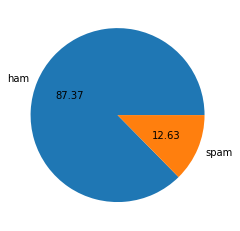

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['no_char']=df.text.apply(len)

In [ ]:
df['no_word']=df.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['no_sent']=df.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['no_char','no_word','no_sent']].describe()

,no_char,no_word,no_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
df

,target,text,no_char,no_word,no_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
#analysis of ham messages
df[df['target']==0][['no_char','no_word','no_sent']].describe()

,no_char,no_word,no_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
#analysis of Spam messages
df[df['target']==1][['no_char','no_word','no_sent']].describe()

,no_char,no_word,no_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


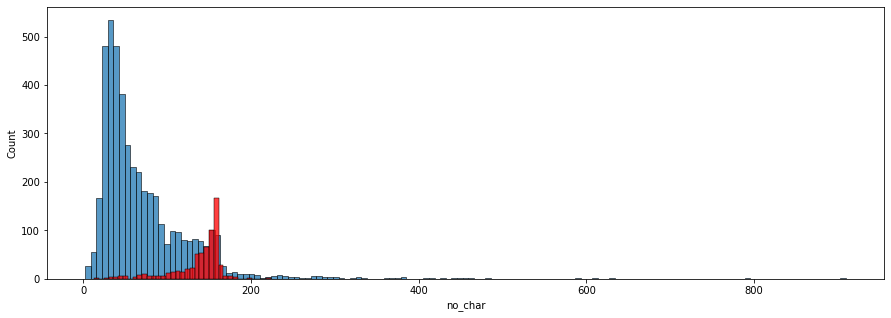

In [ ]:
plt.figure(figsize=(15,5))
import seaborn as sns
sns.histplot(df[df['target']==0]['no_char'])
sns.histplot(df[df['target']==1]['no_char'],color='red')

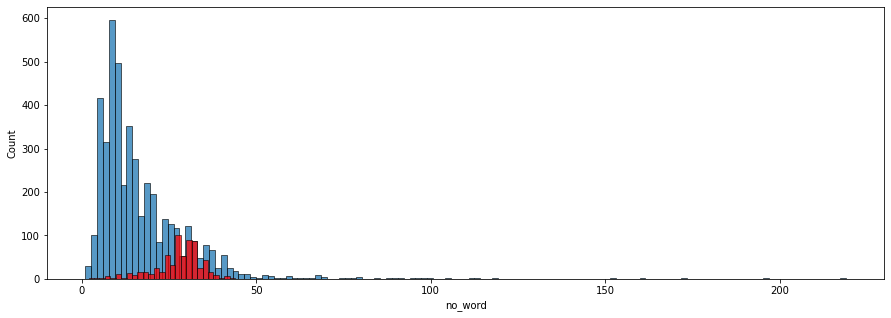

In [ ]:
plt.figure(figsize=(15,5))
import seaborn as sns
sns.histplot(df[df['target']==0]['no_word'])
sns.histplot(df[df['target']==1]['no_word'],color='red')

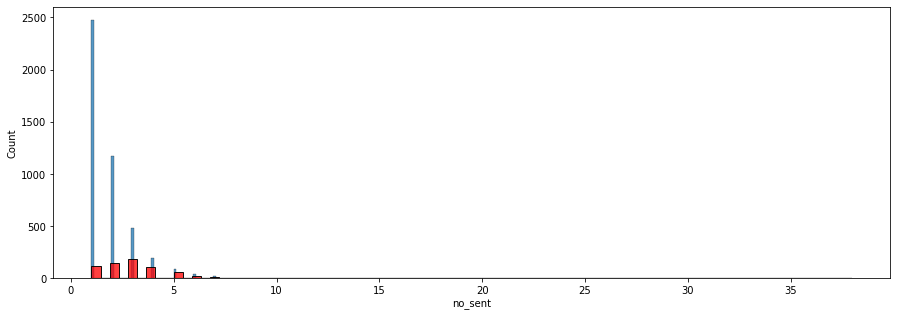

In [ ]:
plt.figure(figsize=(15,5))
import seaborn as sns
sns.histplot(df[df['target']==0]['no_sent'])
sns.histplot(df[df['target']==1]['no_sent'],color='red')

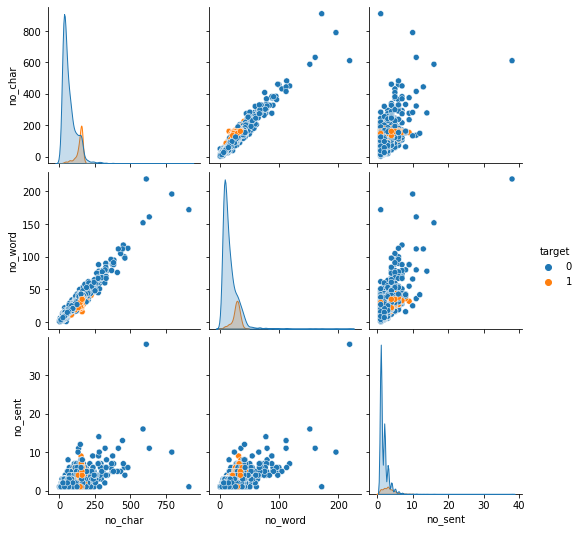

In [ ]:
sns.pairplot(df,hue='target')

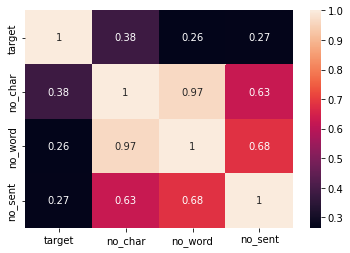

In [ ]:
sns.heatmap(df.corr(),annot=True)

Text processing
1. lower case
2. tokenize
3. remove special charecter
4. remove stop words and punctution
5. stemming

In [ ]:
text='i am #ARPIT maheshwari living in @indore'

In [ ]:
def text_transformed(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
    text=y[:]
  y.clear()
  for i in text:
    if i not in k and  i not in string.punctuation:
       y.append(i)
    text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  text=y[:]
  return ' '.join(y)

In [ ]:
df['text_transformed']=df['text'].apply(text_transformed)

In [ ]:
df.head()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
k=stopwords.words()
k

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('rome')

'rome'

In [ ]:
#Now design word cloud of spam massages

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
wc_spam=wc.generate(df[df['target']==1]['text_transformed'].str.cat(sep=" "))

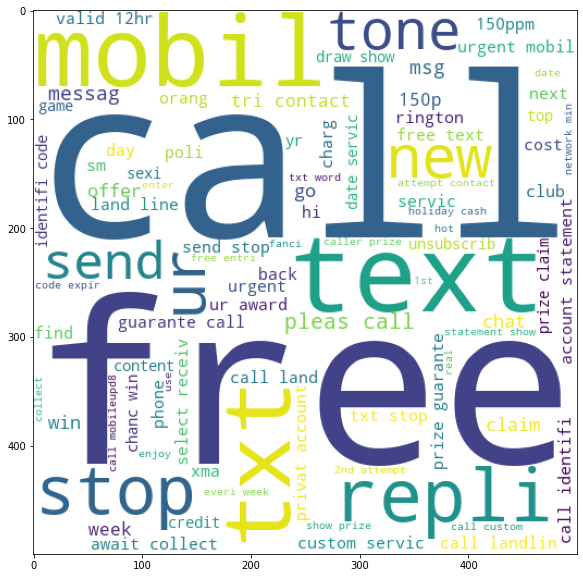

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc_spam)

In [ ]:
#Now design word cloud of ham massages
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')
wc_ham=wc.generate(df[df['target']==0]['text_transformed'].str.cat(sep=" "))

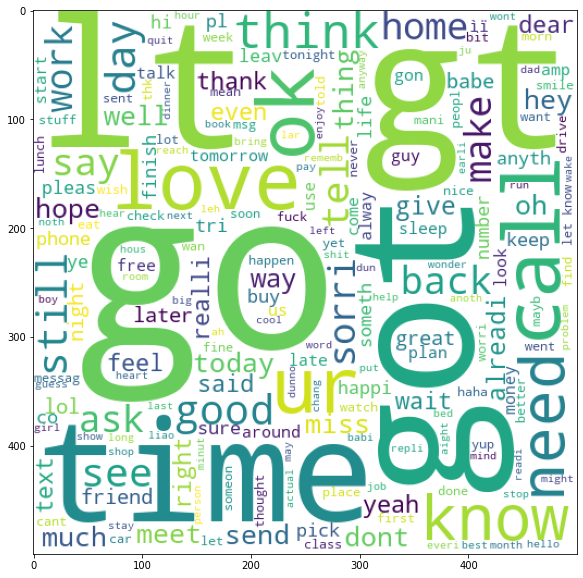

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc_ham)

In [ ]:
#find Top 30 common word in Wordcloud of spam Massage
spam_corpus=[]
for msg in df[df['target']==1]['text_transformed'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9456

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


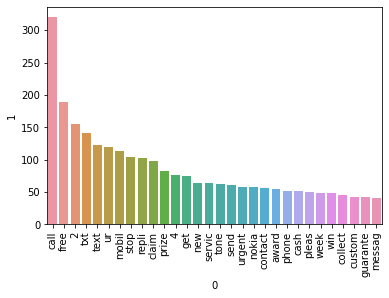

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#find Top 30 common word in Wordcloud of ham Massage
ham_corpus=[]
for msg in df[df['target']==0]['text_transformed'].to_list():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

31206

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


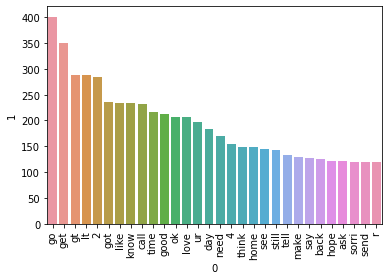

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#model building
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#cv=CountVectorizer()
tf=TfidfVectorizer()
X=tf.fit_transform(df['text_transformed']).toarray()
X.shape
y=df.target.values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
ypred=gnb.predict(X_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(precision_score(y_test,ypred))


0.8375241779497099
[[753 146]
 [ 22 113]]
0.4362934362934363


In [ ]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
ypred=bnb.predict(X_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(precision_score(y_test,ypred))

0.9545454545454546
[[894   5]
 [ 42  93]]
0.9489795918367347


In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
ypred=mnb.predict(X_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(precision_score(y_test,ypred))

0.9497098646034816
[[899   0]
 [ 52  83]]
1.0


In [ ]:
#MNB--->tfidf

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,ExtraTreesClassifier,RandomForestClassifier
from xgboost import XGBClassifier



In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression (solver='liblinear', penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier (n_estimators=50, random_state=2)
bc = BaggingClassifier (n_estimators=50, random_state=2)
etc = ExtraTreesClassifier (n_estimators=50, random_state=2)
godt = GradientBoostingClassifier (n_estimators=50, random_state=2)
xgb = XGBClassifier (n_estimators=50, random_state=2)


In [ ]:
add=lambda a,b:a+b

In [ ]:
add(1,2)

3

In [ ]:
add(2,3)

5
